In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

sys.path.append("../src/")

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
from motion_detection import BasicDetector

In [27]:
def draw_img(img: np.ndarray, figsize: tuple = (16, 9), cmap: str = None):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap=cmap)
    plt.show()

# Basic (simple) task

In [5]:
background_rect = cv2.imread("../data/pictures/blue_rectangle.jpg")[..., ::-1]
foreground_rect = cv2.imread("../data/pictures/purple_rectangle.png")[..., ::-1]

In [6]:
foreground_rect = foreground_rect[30:210, 30:220]

In [7]:
background_rect.shape, foreground_rect.shape

((468, 720, 3), (180, 190, 3))

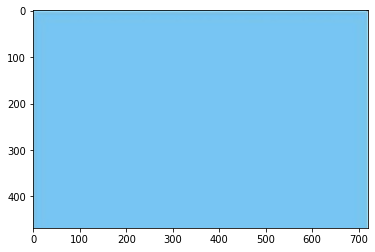

In [8]:
plt.imshow(background_rect)

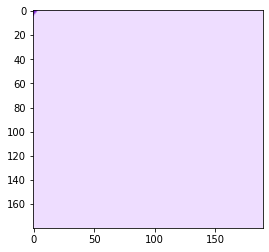

In [9]:
plt.imshow(foreground_rect)

In [10]:
foreground_rect = cv2.resize(foreground_rect, (64, 64))

In [16]:
generated_frames = [background_rect]
for i in range(300):
    x, y, width, height = 10 + i, 150, foreground_rect.shape[1], foreground_rect.shape[0]
    generated_frame = background_rect.copy()
    generated_frame[y:y+height, x:x+width] = foreground_rect
    generated_frames.append(generated_frame)

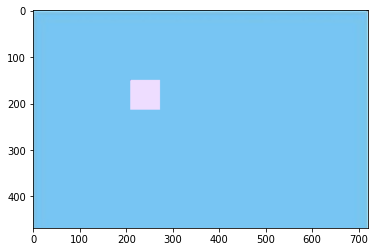

In [17]:
plt.imshow(generated_frames[200])

---

In [11]:
detector = BasicDetector(background_rect)

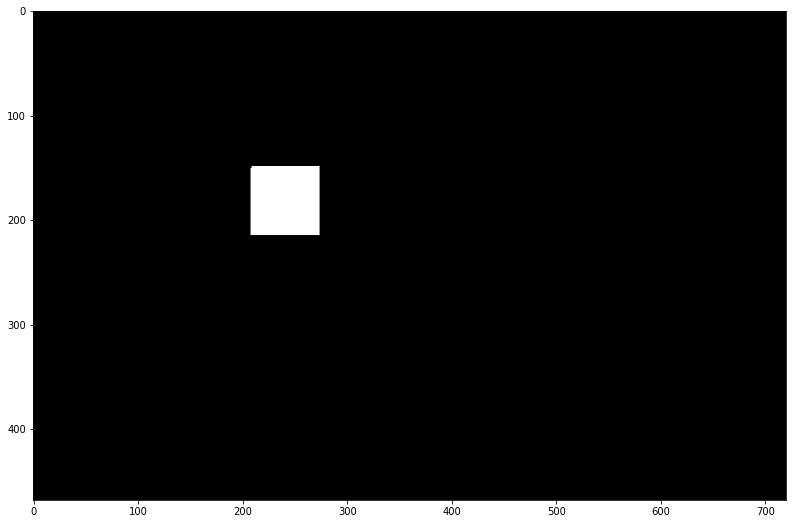

In [29]:
draw_img(detector.get_frame_difference(generated_frames[200], 50), cmap="gray")

---

In [31]:
def convert_to_grayscale(img: np.ndarray, ksize: tuple = (3, 3)) -> np.ndarray:
    # assuming that if shape is equal to 2 than it's already a grayscale image
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.GaussianBlur(img, ksize=ksize, sigmaX=0)

    return img

In [33]:
tmp = convert_to_grayscale(generated_frames[200])
tmp = cv2.absdiff(convert_to_grayscale(background_rect), tmp)

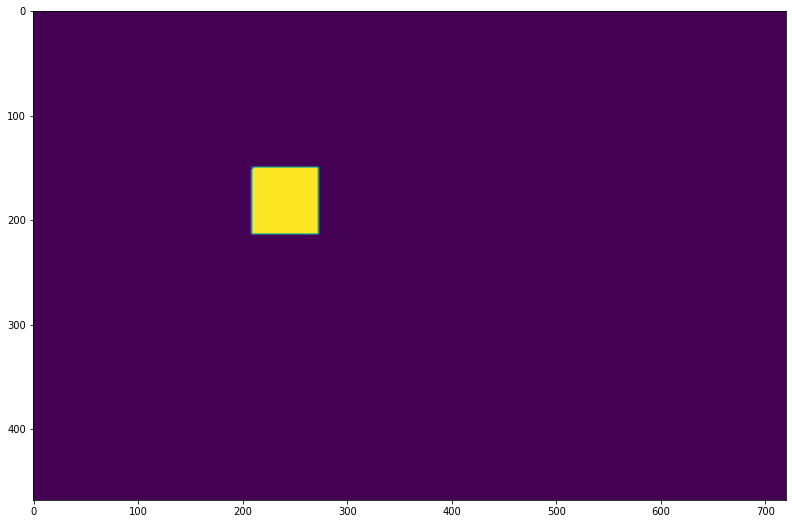

In [34]:
draw_img(tmp)

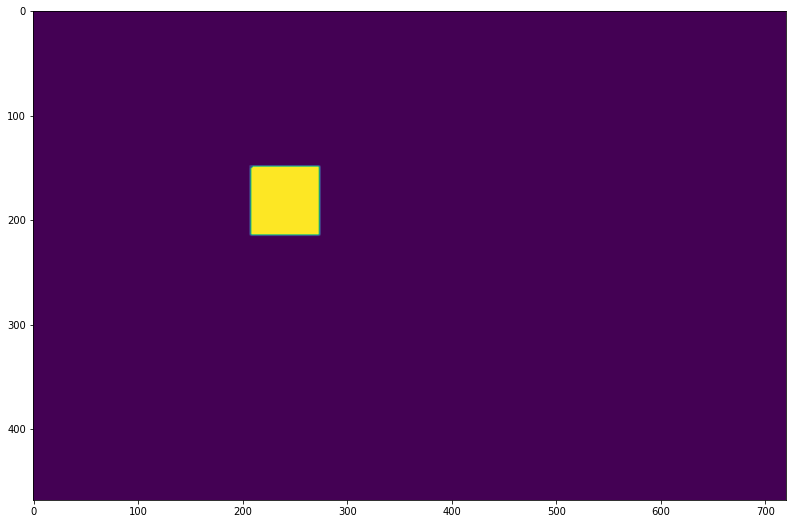

In [39]:
draw_img(cv2.dilate(tmp, np.ones((3, 3), dtype=np.uint8), iterations=1))

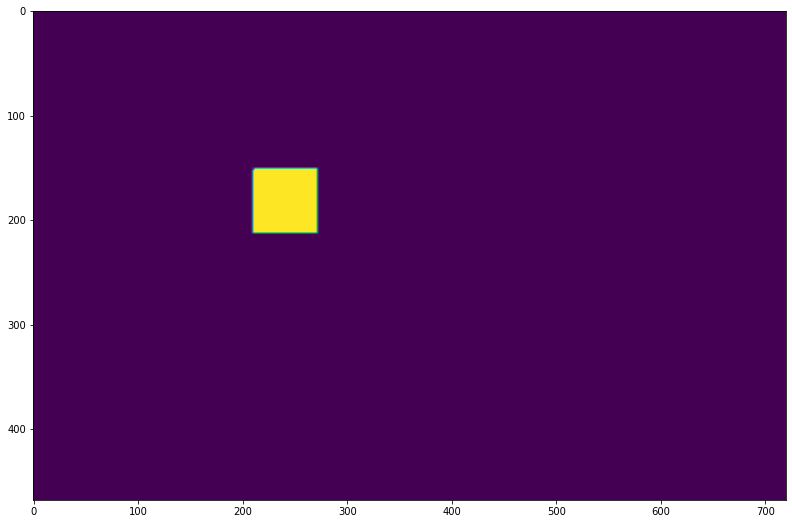

In [45]:
draw_img(cv2.erode(tmp, np.ones((3, 3), dtype=np.uint8), iterations=1))

---

# Car bottom background and rectangular bomb

In [46]:
background = cv2.imread("../../data/car_bottom/car_bottom2.png")[..., ::-1]
foreground = cv2.imread("../../data/bombs/c4_csgo.webp")[..., ::-1]

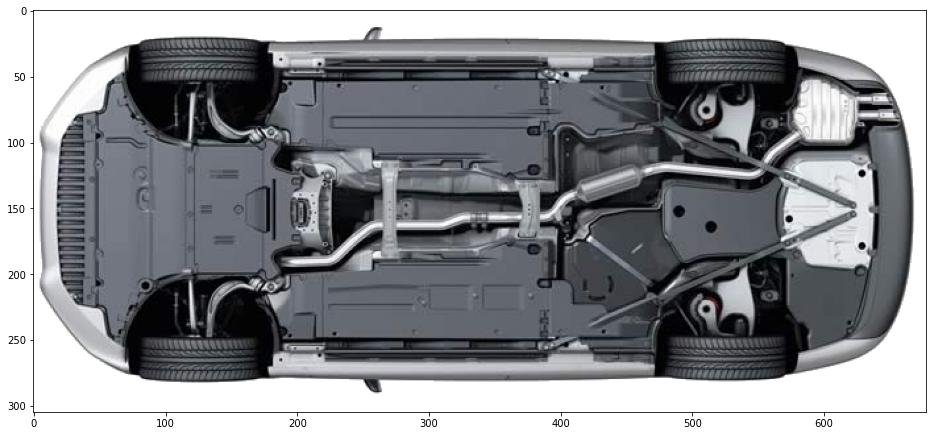

In [47]:
draw_img(background)

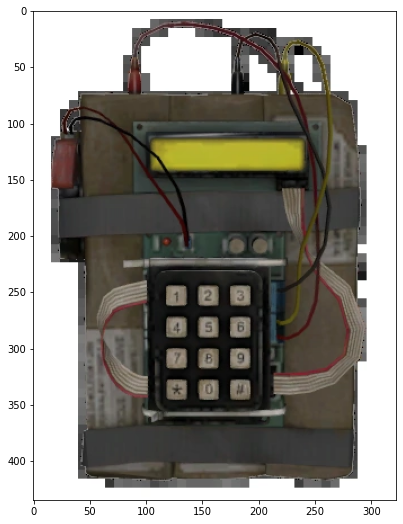

In [48]:
draw_img(foreground)

In [49]:
foreground = cv2.resize(foreground, (64, 64))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [51]:
generated_frames = [background]
for i in range(300):
    x, y, width, height = 10 + i, 150, foreground.shape[1], foreground.shape[0]
    generated_frame = background.copy()
    generated_frame[y:y+height, x:x+width] = foreground
    generated_frames.append(generated_frame)

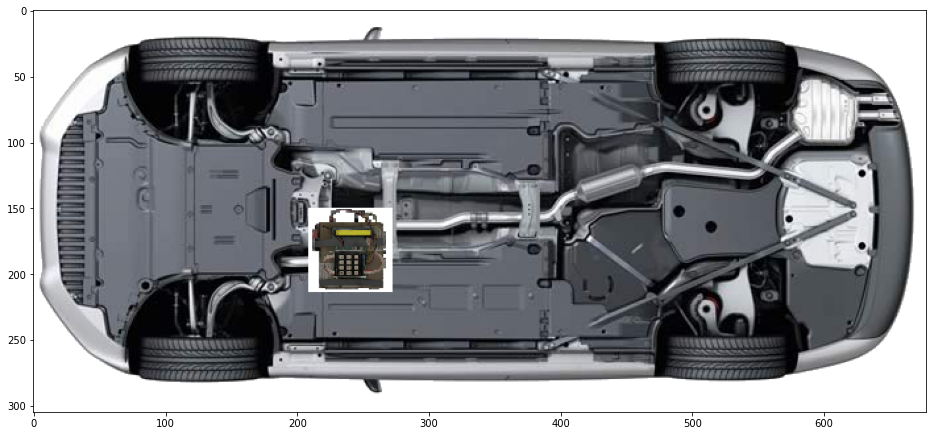

In [52]:
draw_img(generated_frames[200])

---

In [54]:
tmp = convert_to_grayscale(generated_frames[200])
tmp = cv2.absdiff(convert_to_grayscale(background), tmp)

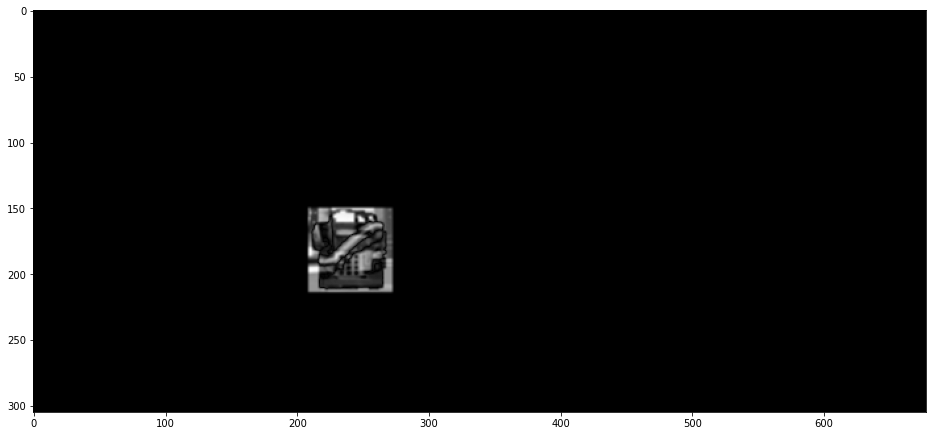

In [58]:
draw_img(tmp, cmap="gray")

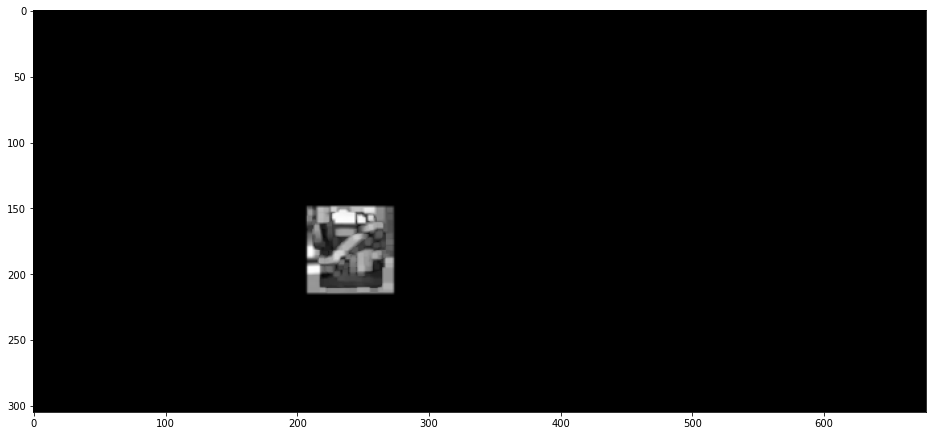

In [59]:
draw_img(cv2.dilate(tmp, np.ones((3, 3), dtype=np.uint8), iterations=1), cmap="gray")

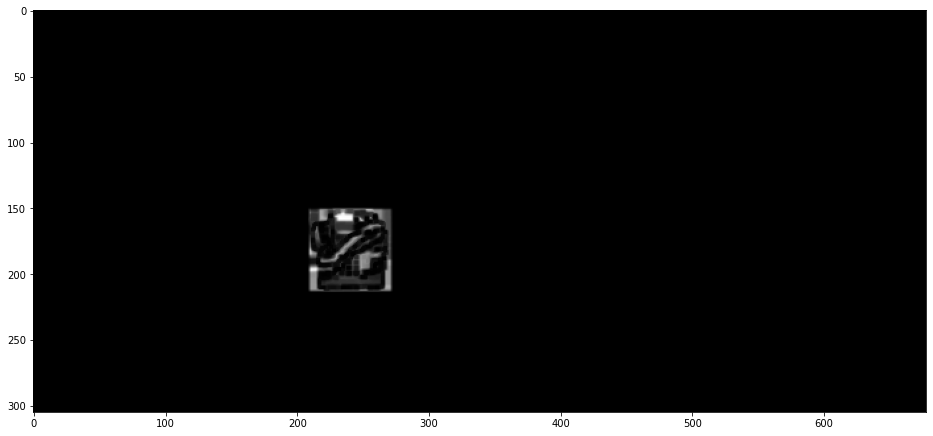

In [60]:
draw_img(cv2.erode(tmp, np.ones((3, 3), dtype=np.uint8), iterations=1), cmap="gray")

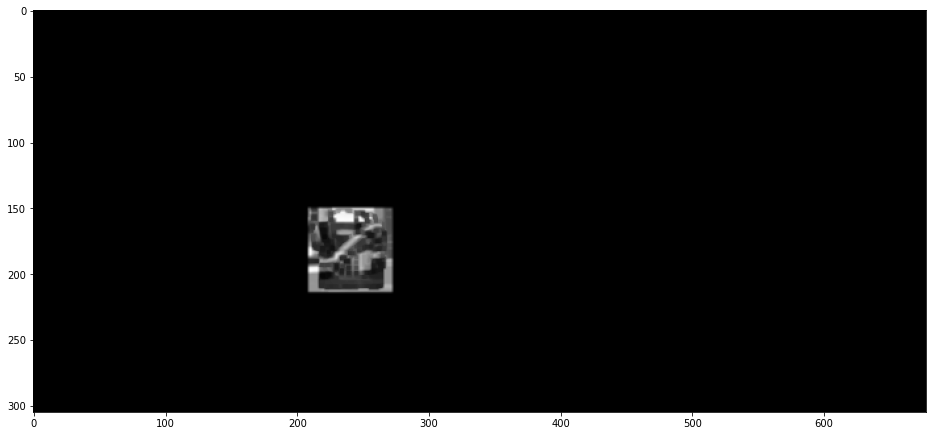

In [62]:
draw_img(cv2.morphologyEx(tmp, cv2.MORPH_CLOSE, np.ones((3, 3), dtype=np.uint8)), cmap="gray")

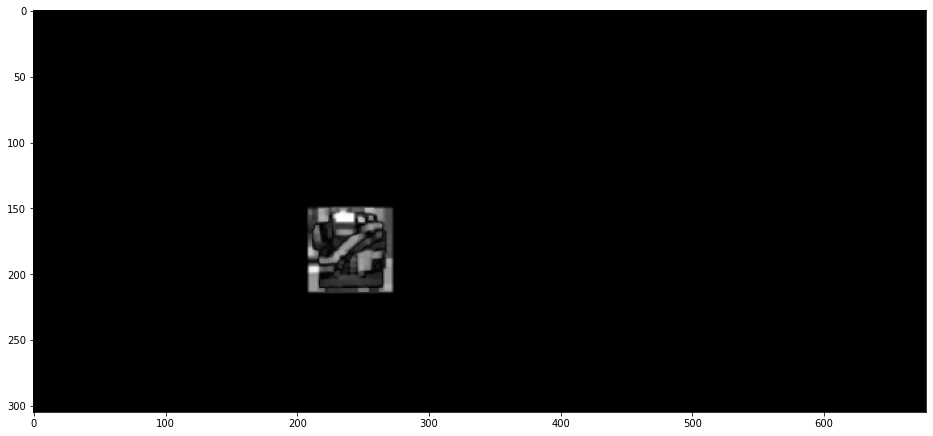

In [63]:
draw_img(cv2.morphologyEx(tmp, cv2.MORPH_OPEN, np.ones((3, 3), dtype=np.uint8)), cmap="gray")

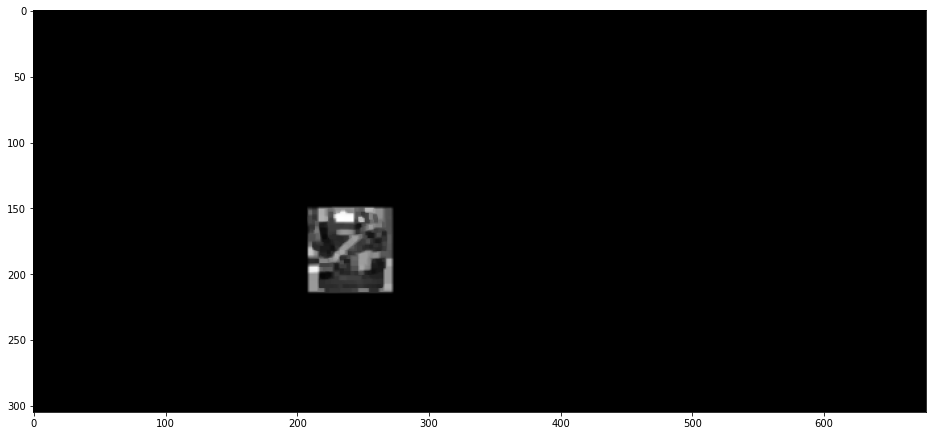

In [64]:
draw_img(cv2.morphologyEx(cv2.morphologyEx(tmp, cv2.MORPH_CLOSE, np.ones((3, 3), dtype=np.uint8)), cv2.MORPH_OPEN, np.ones((3, 3), dtype=np.uint8)), cmap="gray")

---

# Car bottom background and masked (non-rectangular) bomb

In [65]:
foreground_img = Image.fromarray(foreground)
foreground_mask = Image.fromarray((foreground < 255).astype(np.uint8) * 255).convert("L")

In [67]:
generated_frames = [background]
for i in range(300):
    x, y, width, height = 10 + i, 150, foreground.shape[1], foreground.shape[0]
    generated_frame = Image.fromarray(background)
    generated_frame.paste(foreground_img, (x, y), mask=foreground_mask)
    generated_frames.append(np.asarray(generated_frame, np.uint8))

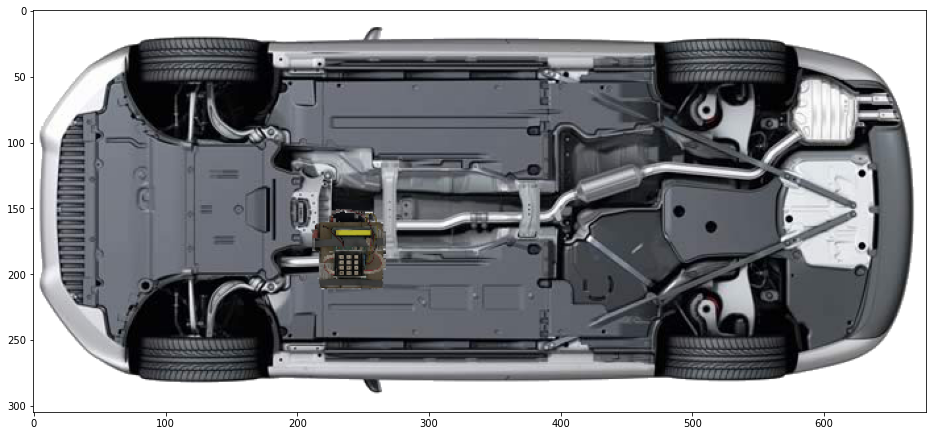

In [68]:
draw_img(generated_frames[200])

In [69]:
tmp = convert_to_grayscale(generated_frames[200])
tmp = cv2.absdiff(convert_to_grayscale(background), tmp)

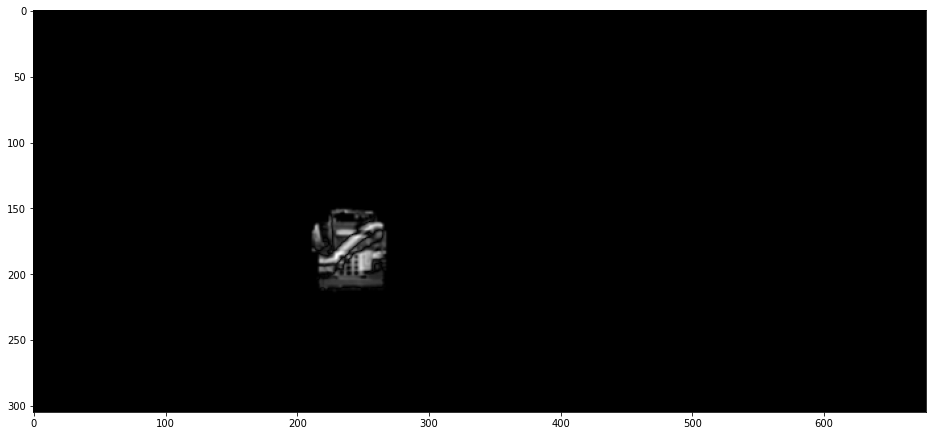

In [70]:
draw_img(tmp, cmap="gray")

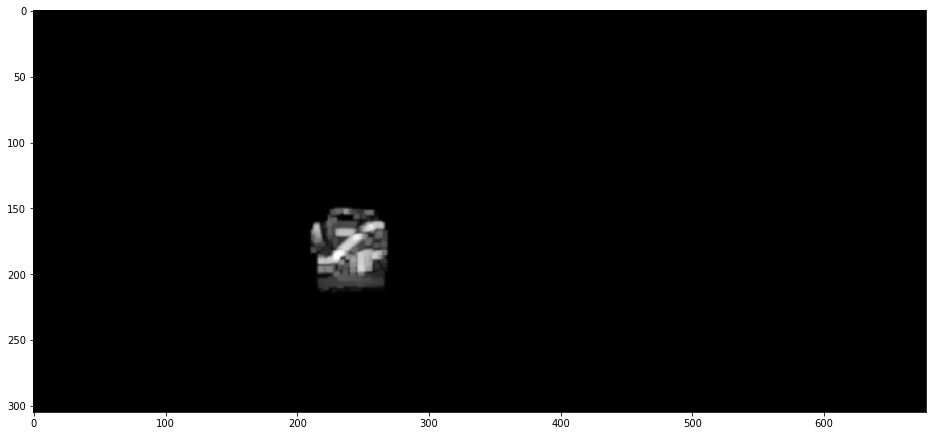

In [71]:
draw_img(cv2.dilate(tmp, np.ones((3, 3), dtype=np.uint8), iterations=1), cmap="gray")

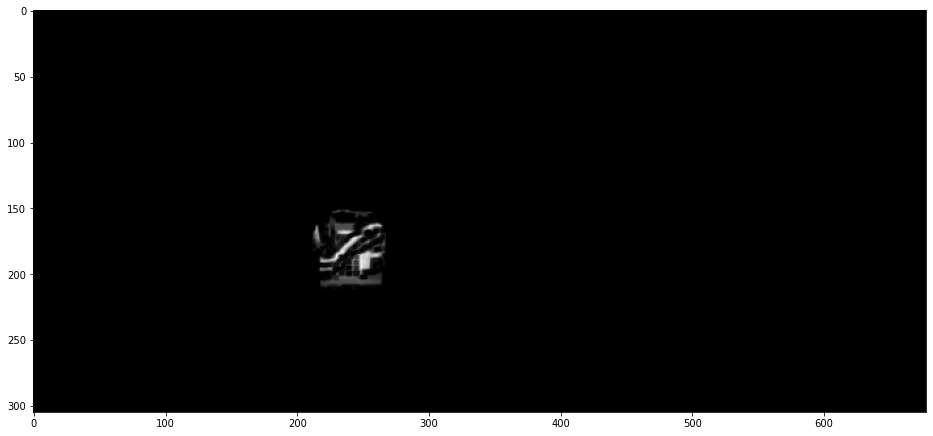

In [72]:
draw_img(cv2.erode(tmp, np.ones((3, 3), dtype=np.uint8), iterations=1), cmap="gray")

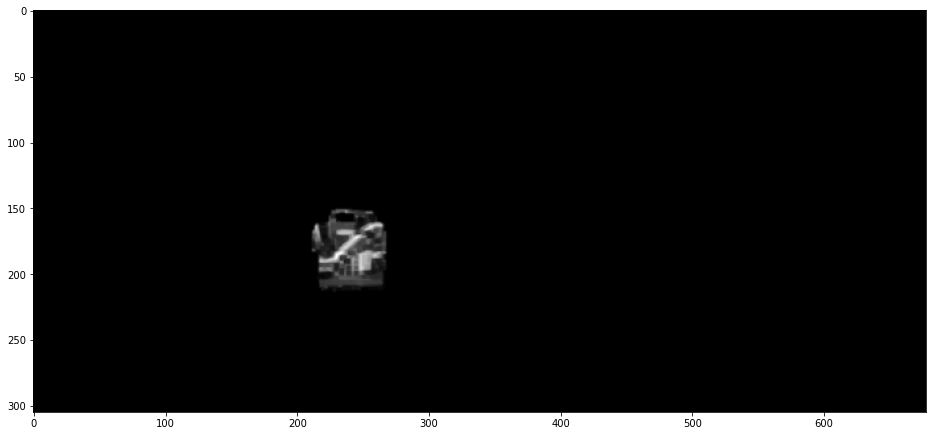

In [73]:
draw_img(cv2.morphologyEx(tmp, cv2.MORPH_CLOSE, np.ones((3, 3), dtype=np.uint8)), cmap="gray")

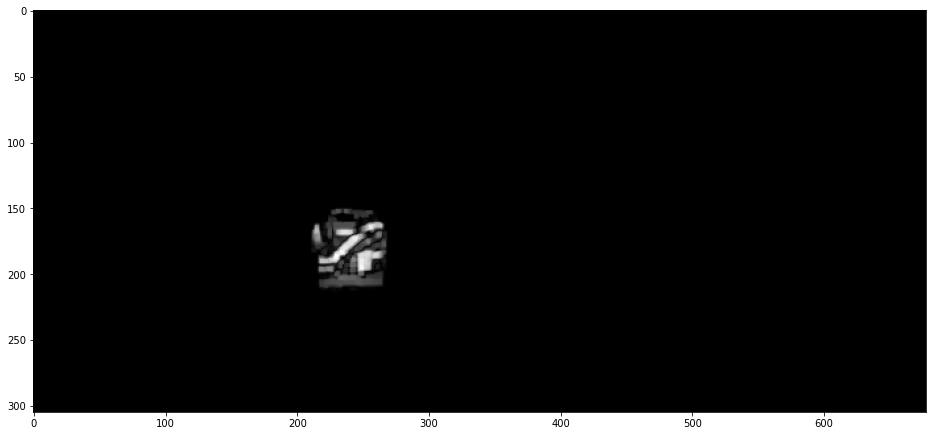

In [74]:
draw_img(cv2.morphologyEx(tmp, cv2.MORPH_OPEN, np.ones((3, 3), dtype=np.uint8)), cmap="gray")

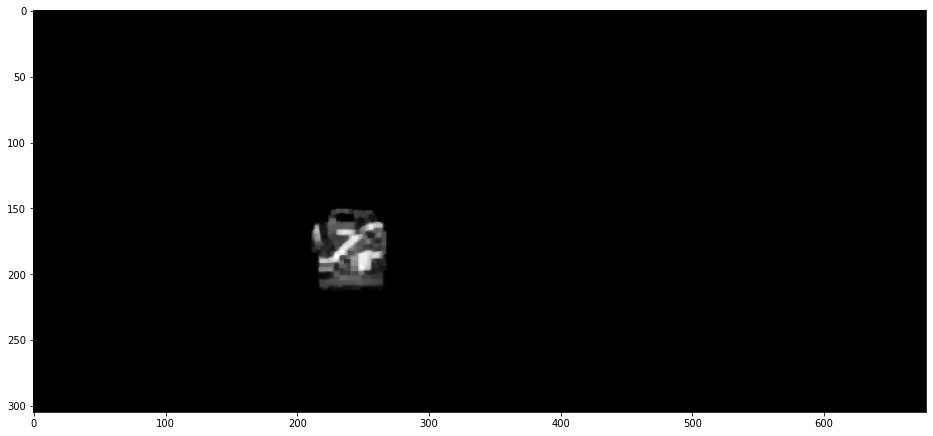

In [75]:
draw_img(cv2.morphologyEx(cv2.morphologyEx(tmp, cv2.MORPH_CLOSE, np.ones((3, 3), dtype=np.uint8)), cv2.MORPH_OPEN, np.ones((3, 3), dtype=np.uint8)), cmap="gray")

In [78]:
tmp_dilated = cv2.dilate(tmp, np.ones((3, 3), dtype=np.uint8), iterations=1)
tmp_eroded = cv2.erode(tmp, np.ones((3, 3), dtype=np.uint8), iterations=1)
tmp_closed = cv2.morphologyEx(tmp, cv2.MORPH_CLOSE, np.ones((3, 3), dtype=np.uint8))
tmp_opened = cv2.morphologyEx(tmp, cv2.MORPH_OPEN, np.ones((3, 3), dtype=np.uint8))

In [80]:
def get_objects_bboxes(img: np.ndarray, threshold: int = 50):
    contours, _ = cv2.findContours(
        img, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE
    )
    bboxes = []
    for contour in contours:
        if cv2.contourArea(contour) < threshold:
            continue

        bboxes.append(cv2.boundingRect(contour))

    return bboxes

In [81]:
detections_dilated = get_objects_bboxes(tmp_dilated)
detections_eroded = get_objects_bboxes(tmp_eroded)
detections_closed = get_objects_bboxes(tmp_closed)
detections_opened = get_objects_bboxes(tmp_opened)

In [82]:
len(detections_dilated), len(detections_eroded), len(detections_closed), len(detections_opened)

(1, 1, 1, 1)

In [89]:
frame_annot = generated_frames[200].copy()
for bbox in detections_opened:
    x, y, width, height = bbox
    cv2.rectangle(frame_annot, (x, y), (x+width, y+height), color=(255, 0, 0), thickness=2)

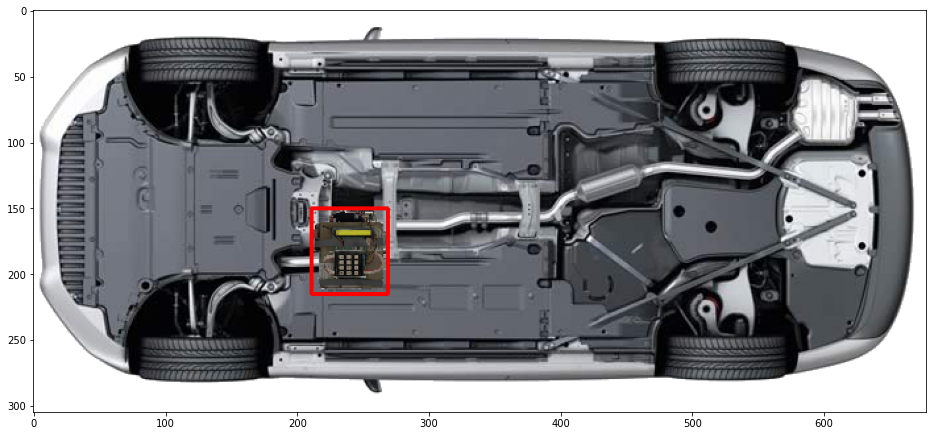

In [90]:
draw_img(frame_annot)